# Plotting

`matplotlib` is the most widely-used scientific plotting library in python
* we're going to use a sub-library called `pyplot`
* `plt` is a common alias

In [1]:
import matplotlib.pyplot as plt

## Plotting data from `pandas DataFrame`

let's start with the Oceania GDP data

In [2]:
import pandas as pd
data = pd.read_csv('../data/gapminder_gdp_oceania.csv', index_col='country')
data

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


We'd like to plot the data over time, but we can't because the year data is not numeric. 

Let's do a bit of data cleaning to get that sorted.

In [6]:
years = data.columns.str.strip('gdpPercap_')
data.columns = years.astype(int)

AttributeError: Can only use .str accessor with string values!

In [4]:
data

,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
country,,,,,,,,,,,,
Australia,10039.59564,10949.64959,12217.22686,14526.12465,16788.62948,18334.19751,19477.00928,21888.88903,23424.76683,26997.93657,30687.75473,34435.36744
New Zealand,10556.57566,12247.39532,13175.67800,14463.91893,16046.03728,16233.71770,17632.41040,19007.19129,18363.32494,21050.41377,23189.80135,25185.00911


Now we're ready to plot. We'll use `loc` to find the Australia row and and plot it. The plot automatically uses the column labels.




<AxesSubplot:>

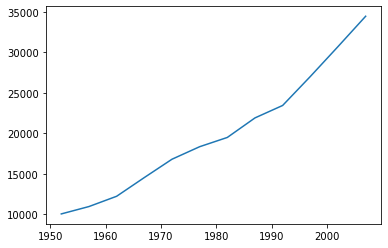

In [7]:
data.loc['Australia'].plot()

## Plotting multiple lines

If we want to plot all the data in our table, we'll have to transpose it, because `pyplot` is expecting the data for each country to be in columns.

let's also add a label to the y axis ising `plt.ylabel`

Text(0, 0.5, 'GDP per capita')

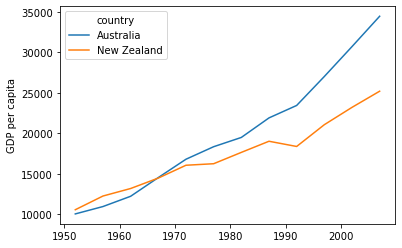

In [8]:
data.T.plot()
plt.ylabel('GDP per capita')

## Other types of plots

Line plot is the default for these types of plots. To change the style, we can use the `kind` argument.

Text(0, 0.5, 'GDP per capita')

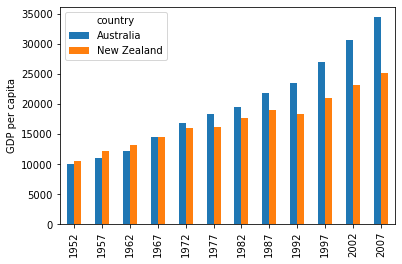

In [9]:
data.T.plot(kind='bar')
plt.ylabel('GDP per capita')

## Plotting with `matplotlib` directly

You can also call the matplotlib plot function directly, instead of calling it implicitly as a method on a data frame

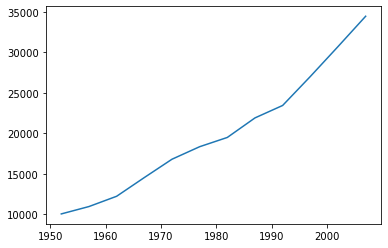

In [11]:
years = data.columns
gdp_australia = data.loc['Australia']

plt.plot(years, gdp_australia)

Then you can play with dashed lines and colors.

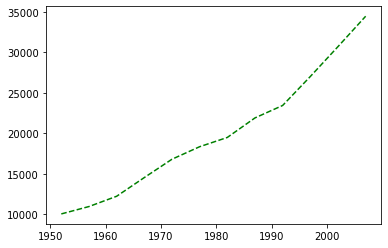

In [12]:
plt.plot(years, gdp_australia, 'g--')

You can also plot many datasets together

Text(0, 0.5, 'GDP per capita ($)')

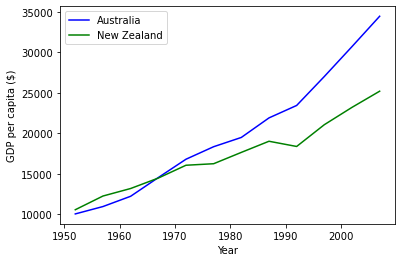

In [15]:
# Select two countries' worth of data.
gdp_australia = data.loc['Australia']
gdp_nz = data.loc['New Zealand']

# Plot with differently-colored markers.
plt.plot(years, gdp_australia, 'b-', label='Australia')
plt.plot(years, gdp_nz, 'g-', label='New Zealand')

# Create legend.
plt.legend(loc='upper left')
plt.xlabel('Year')
plt.ylabel('GDP per capita ($)')

## Scatter plots

You can create scatter plots from a pandas `DataFrame` or from `matplotlib` directly

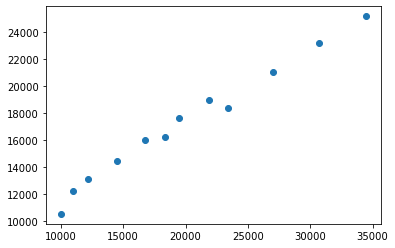

In [16]:
plt.scatter(gdp_australia, gdp_nz)

<AxesSubplot:xlabel='Australia', ylabel='New Zealand'>

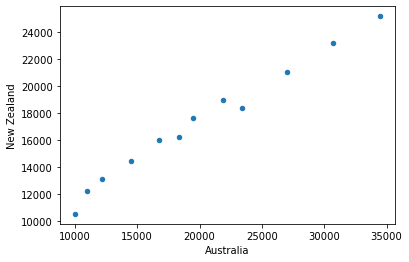

In [17]:
data.T.plot.scatter(x = 'Australia', y = 'New Zealand')

# Exercise

Here is some code that creates a plot of min and max GDP over time for European countries

```
data_europe = pd.read_csv('data/gapminder_gdp_europe.csv', index_col='country')
data_europe.min().plot(label='min')
data_europe.max().plot(label='max')
plt.legend(loc='best')
plt.xticks(rotation=90)
```

Modify this example to create a scatter plot  showing the relationship between the min and max GDP per capita for countries in asia for each year in the dataset.

# Answer

<AxesSubplot:xlabel='min', ylabel='max'>

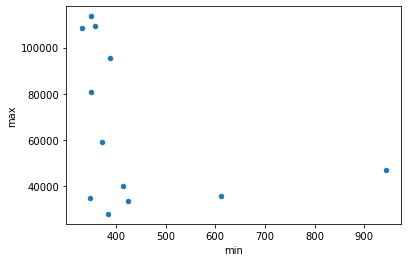

In [18]:
data_asia = pd.read_csv('../data/gapminder_gdp_asia.csv', index_col='country')
data_asia.describe().T.plot(kind='scatter', x='min', y='max')